## Background

Selected molecular descriptors from the Dragon chemoinformatics application were used to predict bioconcentration factors for 779 chemicals in order to evaluate QSAR (Quantitative Structure Activity Relationship).  This dataset was obtained from the UCI machine learning repository.

The dataset consists of 779 observations of 10 attributes. Below is a brief description of each feature and the response variable (logBCF) in our dataset:

1. *nHM* - number of heavy atoms (integer)
2. *piPC09* - molecular multiple path count (numeric)
3. *PCD* - difference between multiple path count and path count (numeric)
4. *X2Av* - average valence connectivity (numeric)
5. *MLOGP* - Moriguchi octanol-water partition coefficient (numeric)
6. *ON1V* -  overall modified Zagreb index by valence vertex degrees (numeric)
7. *N.072* - Frequency of RCO-N< / >N-X=X fragments (integer)
8. *B02[C-N]* - Presence/Absence of C-N atom pairs (binary)
9. *F04[C-O]* - Frequency of C-O atom pairs (integer)
10. *logBCF* - Bioconcentration Factor in log units (numeric)

Note that all predictors with the exception of B02[C-N] are quantitative.  For the purpose of this assignment, DO NOT CONVERT B02[C-N] to factor.  Leave the data in its original format - numeric in R.

Please load the dataset "Bio_pred" and then split the dataset into a train and test set in a 80:20 ratio.

Please make sure that you are using R version 3.6.X or above (i.e. version 4.X is also acceptable).

## Read Data

In [8]:
# Clear variables in memory
rm(list=ls())

# Import the libraries
library(CombMSC)
library(boot)
library(leaps)
library(MASS)
library(glmnet)

# Ensure that the sampling type is correct
RNGkind(sample.kind="Rejection")

# Set a seed for reproducibility
set.seed(100)

# Read data
fullData = read.csv("Bio_pred.csv",header=TRUE)

# Split data for traIning and testing
testRows = sample(nrow(fullData),0.2*nrow(fullData))
testData = fullData[testRows, ]
trainData = fullData[-testRows, ]

Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.1-1


Note: Use the training set to build the models in Questions 1-6. Use the test set to help evaluate model performance in Question 7.

## Question 1: Full Model

(a) Fit a multiple linear regression with the variable *logBCF* as the response and the other variables as predictors. Call it *model1*. Display the model summary.

In [10]:
model1 = lm(logBCF ~ ., data=trainData)
summary(model1)


Call:
lm(formula = logBCF ~ ., data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2577 -0.5180  0.0448  0.5117  4.0423 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.001422   0.138057   0.010  0.99179    
nHM          0.137022   0.022462   6.100 1.88e-09 ***
piPC09       0.031158   0.020874   1.493  0.13603    
PCD          0.055655   0.063874   0.871  0.38391    
X2Av        -0.031890   0.253574  -0.126  0.89996    
MLOGP        0.506088   0.034211  14.793  < 2e-16 ***
ON1V         0.140595   0.066810   2.104  0.03575 *  
N.072       -0.073334   0.070993  -1.033  0.30202    
B02.C.N.    -0.158231   0.080143  -1.974  0.04879 *  
F04.C.O.    -0.030763   0.009667  -3.182  0.00154 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7957 on 614 degrees of freedom
Multiple R-squared:  0.6672,	Adjusted R-squared:  0.6623 
F-statistic: 136.8 on 9 and 614 DF,  p-value: < 2.2e-16


(b) Which regression coefficients are significant at the 95% confidence level? At the 99% confidence level?

<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
At the 95% confidence level: nHM, MLOGP, ON1V, B02.C.N, F04.C.O<br>
At the 99% Confidence level: nHM, MLOGP, ON1V, B02.C.N, F04.C.O
</div>

(c) What are the Mallow's Cp, AIC, and BIC criterion values for this model?

In [35]:
set.seed(100)
library(CombMSC)
c("CP: ", Cp(model1, S2=24.86^2))
c("AIC: ", AIC(model1))



[1] "CP: "              "-603.371048508102"

[1] "AIC: "            "1497.47653274345"

(d) Build a new model on the training data with only the variables which coefficients were found to be statistically significant at the 99% confidence level. Call it *model2*. Perform a Partial F-test to compare this new model (*model2*) with the full model (*model1*). Which one would you prefer? Is it good practice to select variables based on statistical significance of individual coefficients? Explain.

In [37]:
set.seed(100)
model2 = lm(logBCF ~ nHM + MLOGP + ON1V + B02.C.N. + F04.C.O., data=trainData)
summary(model2)



Call:
lm(formula = logBCF ~ nHM + MLOGP + ON1V + B02.C.N. + F04.C.O., 
    data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4897 -0.5157  0.0361  0.5436  4.0525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.035709   0.097138  -0.368   0.7133    
nHM          0.124981   0.019202   6.509 1.57e-10 ***
MLOGP        0.569653   0.026171  21.767  < 2e-16 ***
ON1V         0.129941   0.054767   2.373   0.0180 *  
B02.C.N.    -0.119519   0.072402  -1.651   0.0993 .  
F04.C.O.    -0.023428   0.009311  -2.516   0.0121 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8002 on 618 degrees of freedom
Multiple R-squared:  0.6612,	Adjusted R-squared:  0.6585 
F-statistic: 241.2 on 5 and 618 DF,  p-value: < 2.2e-16


In [38]:
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
614,388.7043,NA,NA,NA,NA
618,395.6696,-4,-6.965275,2.750599,0.02744663


<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
p value is less than 0.05, so we can say that at least one of the coefficients removed from the model is non-zero. We thus prefer model1. It is not good practice to select variables based on statistical significance of individual coefficients because their impact may change depending on which variables are selected.
    </div>

## Question 2: Full Model Search

(a) Compare all possible models using Mallow's Cp. What is the total number of possible models with the full set of variables? Display a table indicating the variables included in the best model of each size and the corresponding Mallow's Cp value. 

Hint: You can use nbest parameter. 

In [45]:
head(trainData[,-10])

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N.072,B02.C.N.,F04.C.O.
2,0,0.000,1.47,0.14,1.70,0.88,0,1,5
3,0,0.000,1.20,0.25,4.14,2.06,0,0,0
4,0,0.000,1.69,0.13,1.89,0.79,0,1,8
5,0,0.000,0.52,0.25,2.65,1.31,0,0,0
6,0,0.000,1.40,0.18,2.85,0.86,0,0,0
8,1,3.446,1.23,0.24,2.01,1.12,0,0,7


In [50]:
set.seed(100)
library(leaps)
out = leaps(trainData[,-10], trainData[,10], method = "Cp", nbest=1)
cbind(as.matrix(out$which),out$Cp)


1,2,3,4,5,6,7,8,9,
0,0,0,0,1,0,0,0,0,58.596851
1,0,0,0,1,0,0,0,0,17.737801
1,1,0,0,1,0,0,0,0,15.184626
1,1,0,0,1,0,0,0,1,9.495041
1,1,0,0,1,0,0,1,1,7.240754
1,1,0,0,1,1,0,1,1,6.116174
1,1,0,0,1,1,1,1,1,6.831852
1,1,1,0,1,1,1,1,1,8.015816
1,1,1,1,1,1,1,1,1,10.000000


<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
There are 2^9 total possible models with the full set of variables
</div>

(b) How many variables are in the model with the lowest Mallow's Cp value? Which variables are they? Fit this model and call it *model3*. Display the model summary.

In [53]:
set.seed(100)
model3 = lm(logBCF ~ nHM + piPC09 + MLOGP + ON1V + B02.C.N. + F04.C.O., data=trainData)
summary(model3)




Call:
lm(formula = logBCF ~ nHM + piPC09 + MLOGP + ON1V + B02.C.N. + 
    F04.C.O., data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2364 -0.5234  0.0421  0.5196  4.1159 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.035785   0.099454   0.360  0.71911    
nHM          0.124086   0.019083   6.502 1.63e-10 ***
piPC09       0.042167   0.014135   2.983  0.00297 ** 
MLOGP        0.528522   0.029434  17.956  < 2e-16 ***
ON1V         0.098099   0.055457   1.769  0.07740 .  
B02.C.N.    -0.160204   0.073225  -2.188  0.02906 *  
F04.C.O.    -0.028644   0.009415  -3.042  0.00245 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7951 on 617 degrees of freedom
Multiple R-squared:  0.666,	Adjusted R-squared:  0.6628 
F-statistic: 205.1 on 6 and 617 DF,  p-value: < 2.2e-16


<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
There are 6 variables in the model with the lowest Mallow's CP value:  nHM + piPC09 + MLOGP + ON1V + B02.C.N. + F04.C.O.
</div>

## Question 3: Stepwise Regression

(a) Perform backward stepwise regression using BIC. Allow the minimum model to be the model with only an intercept, and the full model to be *model1*. Display the model summary of your final model. Call it *model4*

In [55]:
set.seed(100)
minimum <- glm(logBCF ~ 1, data=trainData)
model4 = step(model3, scope=list(lower=minimum, upper=model1), direction = "backward")
summary(model4)


Start:  AIC=-279.21
logBCF ~ nHM + piPC09 + MLOGP + ON1V + B02.C.N. + F04.C.O.

           Df Sum of Sq    RSS      AIC
<none>                  390.04 -279.212
- ON1V      1     1.978 392.02 -278.055
- B02.C.N.  1     3.026 393.07 -276.390
- piPC09    1     5.626 395.67 -272.276
- F04.C.O.  1     5.851 395.89 -271.921
- nHM       1    26.728 416.77 -239.853
- MLOGP     1   203.819 593.86  -18.889



Call:
lm(formula = logBCF ~ nHM + piPC09 + MLOGP + ON1V + B02.C.N. + 
    F04.C.O., data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2364 -0.5234  0.0421  0.5196  4.1159 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.035785   0.099454   0.360  0.71911    
nHM          0.124086   0.019083   6.502 1.63e-10 ***
piPC09       0.042167   0.014135   2.983  0.00297 ** 
MLOGP        0.528522   0.029434  17.956  < 2e-16 ***
ON1V         0.098099   0.055457   1.769  0.07740 .  
B02.C.N.    -0.160204   0.073225  -2.188  0.02906 *  
F04.C.O.    -0.028644   0.009415  -3.042  0.00245 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7951 on 617 degrees of freedom
Multiple R-squared:  0.666,	Adjusted R-squared:  0.6628 
F-statistic: 205.1 on 6 and 617 DF,  p-value: < 2.2e-16


(b) How many variables are in *model4*? Which regression coefficients are significant at the 99% confidence level?


<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
Model 4 has 6 variables. Regression coefficients for nHM, piPC09, MLOGP, B02.C.N and F04.C.O are significant at the 99% level
    </div>

(c) Perform forward stepwise selection with AIC. Allow the minimum model to be the model with only an intercept, and the full model to be *model1*. Display the model summary of your final model. Call it *model5*. Do the variables included in *model5* differ from the variables in *model4*? 


In [57]:
set.seed(100)
model5 = step(model3, scope=list(lower=minimum, upper=model1), direction = "forward")
summary(model5)


Start:  AIC=-279.21
logBCF ~ nHM + piPC09 + MLOGP + ON1V + B02.C.N. + F04.C.O.

        Df Sum of Sq    RSS     AIC
<none>               390.04 -279.21
+ N.072  1   0.81306 389.23 -278.51
+ PCD    1   0.66238 389.38 -278.27
+ X2Av   1   0.02794 390.02 -277.26



Call:
lm(formula = logBCF ~ nHM + piPC09 + MLOGP + ON1V + B02.C.N. + 
    F04.C.O., data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2364 -0.5234  0.0421  0.5196  4.1159 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.035785   0.099454   0.360  0.71911    
nHM          0.124086   0.019083   6.502 1.63e-10 ***
piPC09       0.042167   0.014135   2.983  0.00297 ** 
MLOGP        0.528522   0.029434  17.956  < 2e-16 ***
ON1V         0.098099   0.055457   1.769  0.07740 .  
B02.C.N.    -0.160204   0.073225  -2.188  0.02906 *  
F04.C.O.    -0.028644   0.009415  -3.042  0.00245 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7951 on 617 degrees of freedom
Multiple R-squared:  0.666,	Adjusted R-squared:  0.6628 
F-statistic: 205.1 on 6 and 617 DF,  p-value: < 2.2e-16


<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
Model 5 has 6 variables. Regression coefficients for nHM, piPC09, MLOGP, B02.C.N and F04.C.O are significant at the 99% level
    </div>

(d) Compare the adjusted $R^2$, Mallow's Cp, AICs and BICs of the full model (*model1*), the model found in Question 2 (*model3*), and the model found using backward selection with BIC (*model4*). Which model is preferred based on these criteria and why?

In [ ]:
set.seed(100)



## Question 4: Ridge Regression

(a) Perform ridge regression on the training set. Use cv.glmnet() to find the lambda value that minimizes the cross-validation error using 10 fold CV.

In [104]:
set.seed(100)
library(MASS)
train_cv = cv.glmnet(data.matrix(trainData[,-10]), trainData[,10], alpha=0, nfolds=10)
model6 = glmnet(data.matrix(trainData[,-10]), trainData[,10], alpha=0, nlambda=100)
train_cv$lambda.min


[1] 0.108775

(b) List the value of coefficients at the optimum lambda value.

In [87]:
set.seed(100)
coef(model6, s=train_cv$lambda.min)

10 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)  0.13841426
nHM          0.14391877
piPC09       0.03735762
PCD          0.08235334
X2Av        -0.06901352
MLOGP        0.44403654
ON1V         0.15770114
N.072       -0.09683534
B02.C.N.    -0.20919397
F04.C.O.    -0.03177144

(c) How many variables were selected? Was this result expected? Explain.

<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">

All variables were selected. This was unexpected as it does not match our forward of backwards regression.
    </div>

## Question 5: Lasso Regression

(a) Perform lasso regression on the training set.Use cv.glmnet() to find the lambda value that minimizes the cross-validation error using 10 fold CV.

In [105]:
set.seed(100)
train_cv = cv.glmnet(data.matrix(trainData[,-10]), trainData[,10], alpha=1, nfolds=10)
model7 = glmnet(data.matrix(trainData[,-10]), trainData[,10], alpha=1, nlambda=100)
train_cv$lambda.min

[1] 0.007854436

(b) Plot the regression coefficient path.

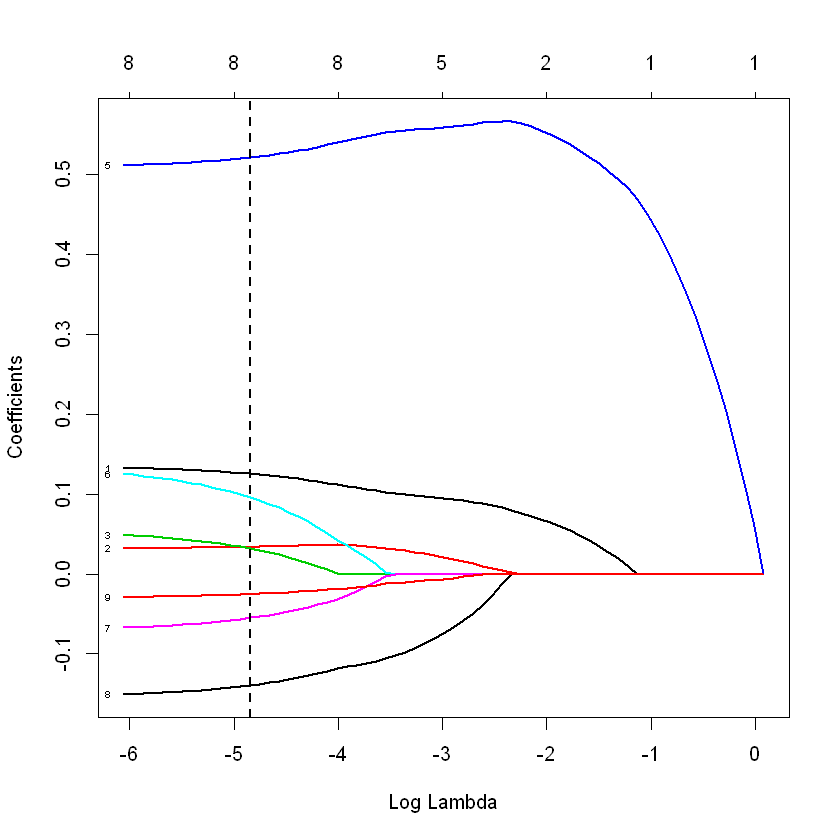

In [89]:
set.seed(100)
plot(model7,xvar="lambda",label=TRUE,lwd=2)
abline(v=log(train_cv$lambda.min),col='black',lty = 2,lwd=2)

(c) How many variables were selected? Which are they?

In [90]:
set.seed(100)
coef(model7, s=train_cv$lambda.min)


10 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)  0.02722838
nHM          0.12543866
piPC09       0.03387665
PCD          0.03194878
X2Av         .         
MLOGP        0.52174346
ON1V         0.09633951
N.072       -0.05487196
B02.C.N.    -0.13961811
F04.C.O.    -0.02535576

<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
8 variables are selected. All except for X2Av</div>

## Question 6: Elastic Net

(a) Perform elastic net regression on the training set. Use cv.glmnet() to find the lambda value that minimizes the cross-validation error using 10 fold CV. Give equal weight to both penalties.

In [106]:
set.seed(100)
train_cv = cv.glmnet(data.matrix(trainData[,-10]), trainData[,10], alpha=0.5, nfolds=10)
model8 = glmnet(data.matrix(trainData[,-10]), trainData[,10], alpha=0.5, nlambda=100)
train_cv$lambda.min

[1] 0.0207662

(b) List the coefficient values at the optimal lambda. How many variables were selected? How do these variables compare to those from Lasso in Question 5?

In [92]:
set.seed(100)
set.seed(100)
coef(model8, s=train_cv$lambda.min)

10 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)  0.04903516
nHM          0.12397290
piPC09       0.03470891
PCD          0.03060034
X2Av         .         
MLOGP        0.51776470
ON1V         0.08901088
N.072       -0.05236840
B02.C.N.    -0.14155538
F04.C.O.    -0.02420217

<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
All variables except for X2Av were selected. This matches lasso from Q5
</div>

## Question 7: Model comparison

(a) Predict *logBCF* for each of the rows in the test data using the full model, and the models found using backward stepwise regression with BIC, ridge regression, lasso regression, and elastic net. Display the first few predictions for each model.

In [125]:
set.seed(100)
m1.pred <- predict(model1, testData, interval="prediction")
head(m1.pred)

m4.pred <- predict(model4, testData, interval="prediction")
head(m4.pred)

m6.pred <- predict(model6, testData, interval="prediction")
head(m6.pred)

m7.pred <- predict(model7, testData, interval="prediction")
head(m7.pred)

m8.pred <- predict(model8, testData, interval="prediction")
head(m8.pred)


,fit,lwr,upr
714,2.446479,0.87707975,4.015878
503,4.333759,2.76395272,5.903565
358,3.266892,1.69926856,4.834515
624,1.664770,0.06548615,3.264053
718,1.955362,0.38323014,3.527495
470,4.333278,2.76342774,5.903128


,fit,lwr,upr
714,2.454699,0.88653029,4.022867
503,4.336886,2.76823970,5.905532
358,3.279941,1.71362219,4.846260
624,1.618796,0.02539812,3.212194
718,1.924693,0.35530889,3.494077
470,4.339247,2.77057318,5.907921


ERROR: Error in cbind2(1, newx) %*% nbeta: not-yet-implemented method for <data.frame> %*% <dgCMatrix>


(b) Compare the predictions using mean squared prediction error. Which model performed the best?

In [122]:
set.seed(100)
mean((testData$logBCF - m1.pred)^2)
mean((testData$logBCF - m4.pred)^2)
mean((testData$logBCF - m6.pred)^2)
mean((testData$logBCF - m7.pred)^2)
mean((testData$logBCF - m8.pred)^2)





[1] 2.237955

[1] 2.232514

ERROR: Error in mean((testData$logBCF - m6.pred)^2): object 'm6.pred' not found


(c) Provide a table listing each method described in Question 7a and the variables selected by each method (see Lesson 5.8 for an example). Which variables were selected consistently?


|        | Backward Stepwise | Ridge | Lasso  | Elastic Net |
|--------|-------------|-------------------|--------|-------|
|nHM     |       x     |      x            |  x     |   x    |          
|piPC09  |       x     |      x            |  x     |   x    | 
|PCD     |             |      x            |  x     |   x    |        
|X2AV    |             |      x            |        |        | 
|MLOGP   |       x     |      x            |  x     |   x    | 
|ON1V    |       x     |      x            |  x     |   x    | 
|N.072   |             |      x            |  x     |   x    | 
|B02.C.N.|       x     |      x            |  x     |   x    |
|F04.C.O.|       x     |      x            |  x     |   x    | 


<div style="background: lightblue; border: 3px solid black; margin: 3px; padding: 5px">
nHM, piPC09, MLOGP, ON1V, B02.C.N, and F04.C.O were consistently selected
</div